In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataMerger

%matplotlib inline

In [39]:
# name, epidemicforecasting.org code, OxCGRT code
# + lithuania
region_info = [
    ("Andorra", "AD", "AND"),
    ("Austria", "AT",  "AUT"),
    ("Albania","AL","ALB"),
    ("Bosnia and Herzegovina", "BA", "BIH"),
    ("Belgium", "BE", "BEL"),
    ("Bulgaria",  "BG", "BGR"),
    ("Switzerland", "CH", "CHE"),
    ("Czech Republic", "CZ", "CZE"),
    ("Germany", "DE", "DEU"),
    ("Denmark", "DK", "DNK"),
    ("Estonia","EE", "EST"),
    ("Spain", "ES", "ESP"),
    ("Finland", "FI", "FIN"),
    ("France", "FR", "FRA"),
    ("United Kingdom", "GB", "GBR"), 
    ("Georgia","GE","GEO"),
    ("Greece", "GR", "GRC"),
    ("Croatia", "HR", "HRV"),
    ("Hungary", "HU", "HUN"),
    ("Ireland", "IE", "IRL"),
    ("Israel", "IL", "ISR"),
    ("Iceland", "IS", "ISL"),
    ("Italy", "IT", "ITA"),
    ("Lithuania","LT","LTU"),
    ("Latvia","LV","LVA"),
    ("Malta","MT","MLT"),
    ("Morocco", "MA", "MAR"),
    ("Mexico","MX", "MEX"),
    ("Malaysia", "MY", "MYS"),
    ("Netherlands", "NL", "NLD"),
    ("Norway","NO","NOR"),
    ("New Zealand","NZ","NZL"),
    ("Poland","PL", "POL"),
    ("Portugal","PT","PRT"),
    ("Romania","RO", "ROU"),
    ("Serbia", "RS", "SRB"),
    ("Sweden", "SE", "SWE"),
    ("Singapore", "SG", "SGP"),
    ("Slovenia", "SI", "SVN"),
    ("Slovakia", "SK", "SVK"),
    ("South Africa", "ZA",  "ZAF"),
]

region_info.sort(key = lambda x: x[0])
region_names = list([x for x, _, _ in region_info])
regions_epi = list([x for _, x, _ in region_info])
regions_oxcgrt = list([x for _, _, x in region_info])

# OxCGRT
oxcgrt_cm_cols = ["H2_Testing policy"]

oxcgrt_filter = [
    ("Symptomatic Testing", [(0, [2, 3])]),
]

epifor_features = {
 "Mask wearing": "Mask Wearing",
 "Some businesses closed": "Some Businesses Suspended",
 "Most nonessential businesses closed": "Most Businesses Suspended",
 "Infection control in healthcare": "Healthcare Infection Control",
 "Stay-at-home order": "Stay Home Order",
 "Gatherings limited to 1000 people or less": "Gatherings <1000",    
 "Gatherings limited to 100 people or less": "Gatherings <100", 
 "Gatherings limited to 10 people or less": "Gatherings <10",
 "Schools closed": "School Closure"
}


final_features = [
 "Healthcare Infection Control",
 "Mask Wearing",
 "Symptomatic Testing",
 "Gatherings <1000",
 "Gatherings <100",
 "Gatherings <10",
 "Some Businesses Suspended",
 "Most Businesses Suspended",
 "School Closure",
 "Stay Home Order"
]

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures: EpidemicForecasting.org           min   ... mean  ... max   ... unique
 1 Mask Wearing                               0.000 ... 0.101 ... 1.000 ... [0. 1.]
 2 Some Businesses Suspended                  0.000 ... 0.410 ... 1.000 ... [0. 1.]
 3 Most Businesses Suspended                  0.000 ... 0.303 ... 1.000 ... [0. 1.]
 4 Healthcare Infection Control               0.000 ... 0.537 ... 1.000 ... [0. 1.]
 5 Stay Home Order                            0.000 ... 0.197 ... 1.000 ... [0. 1.]
 6 Gatherings <1000                           0.000 ... 0.456 ... 1.000 ... [0. 1.]
 7 Gatherings <100                            0.000 ... 0.423 ... 1.000 ... [0. 1.]
 8 Gatherings <10                             0.000 ... 0.342 ... 1.000 ... [0. 1.]
 9 School Closure                             0.000 ... 0.448 ... 1.000 ... [0. 1.]
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Load OXCGRT
INFO:epimodel.pymc3_models.cm_effec

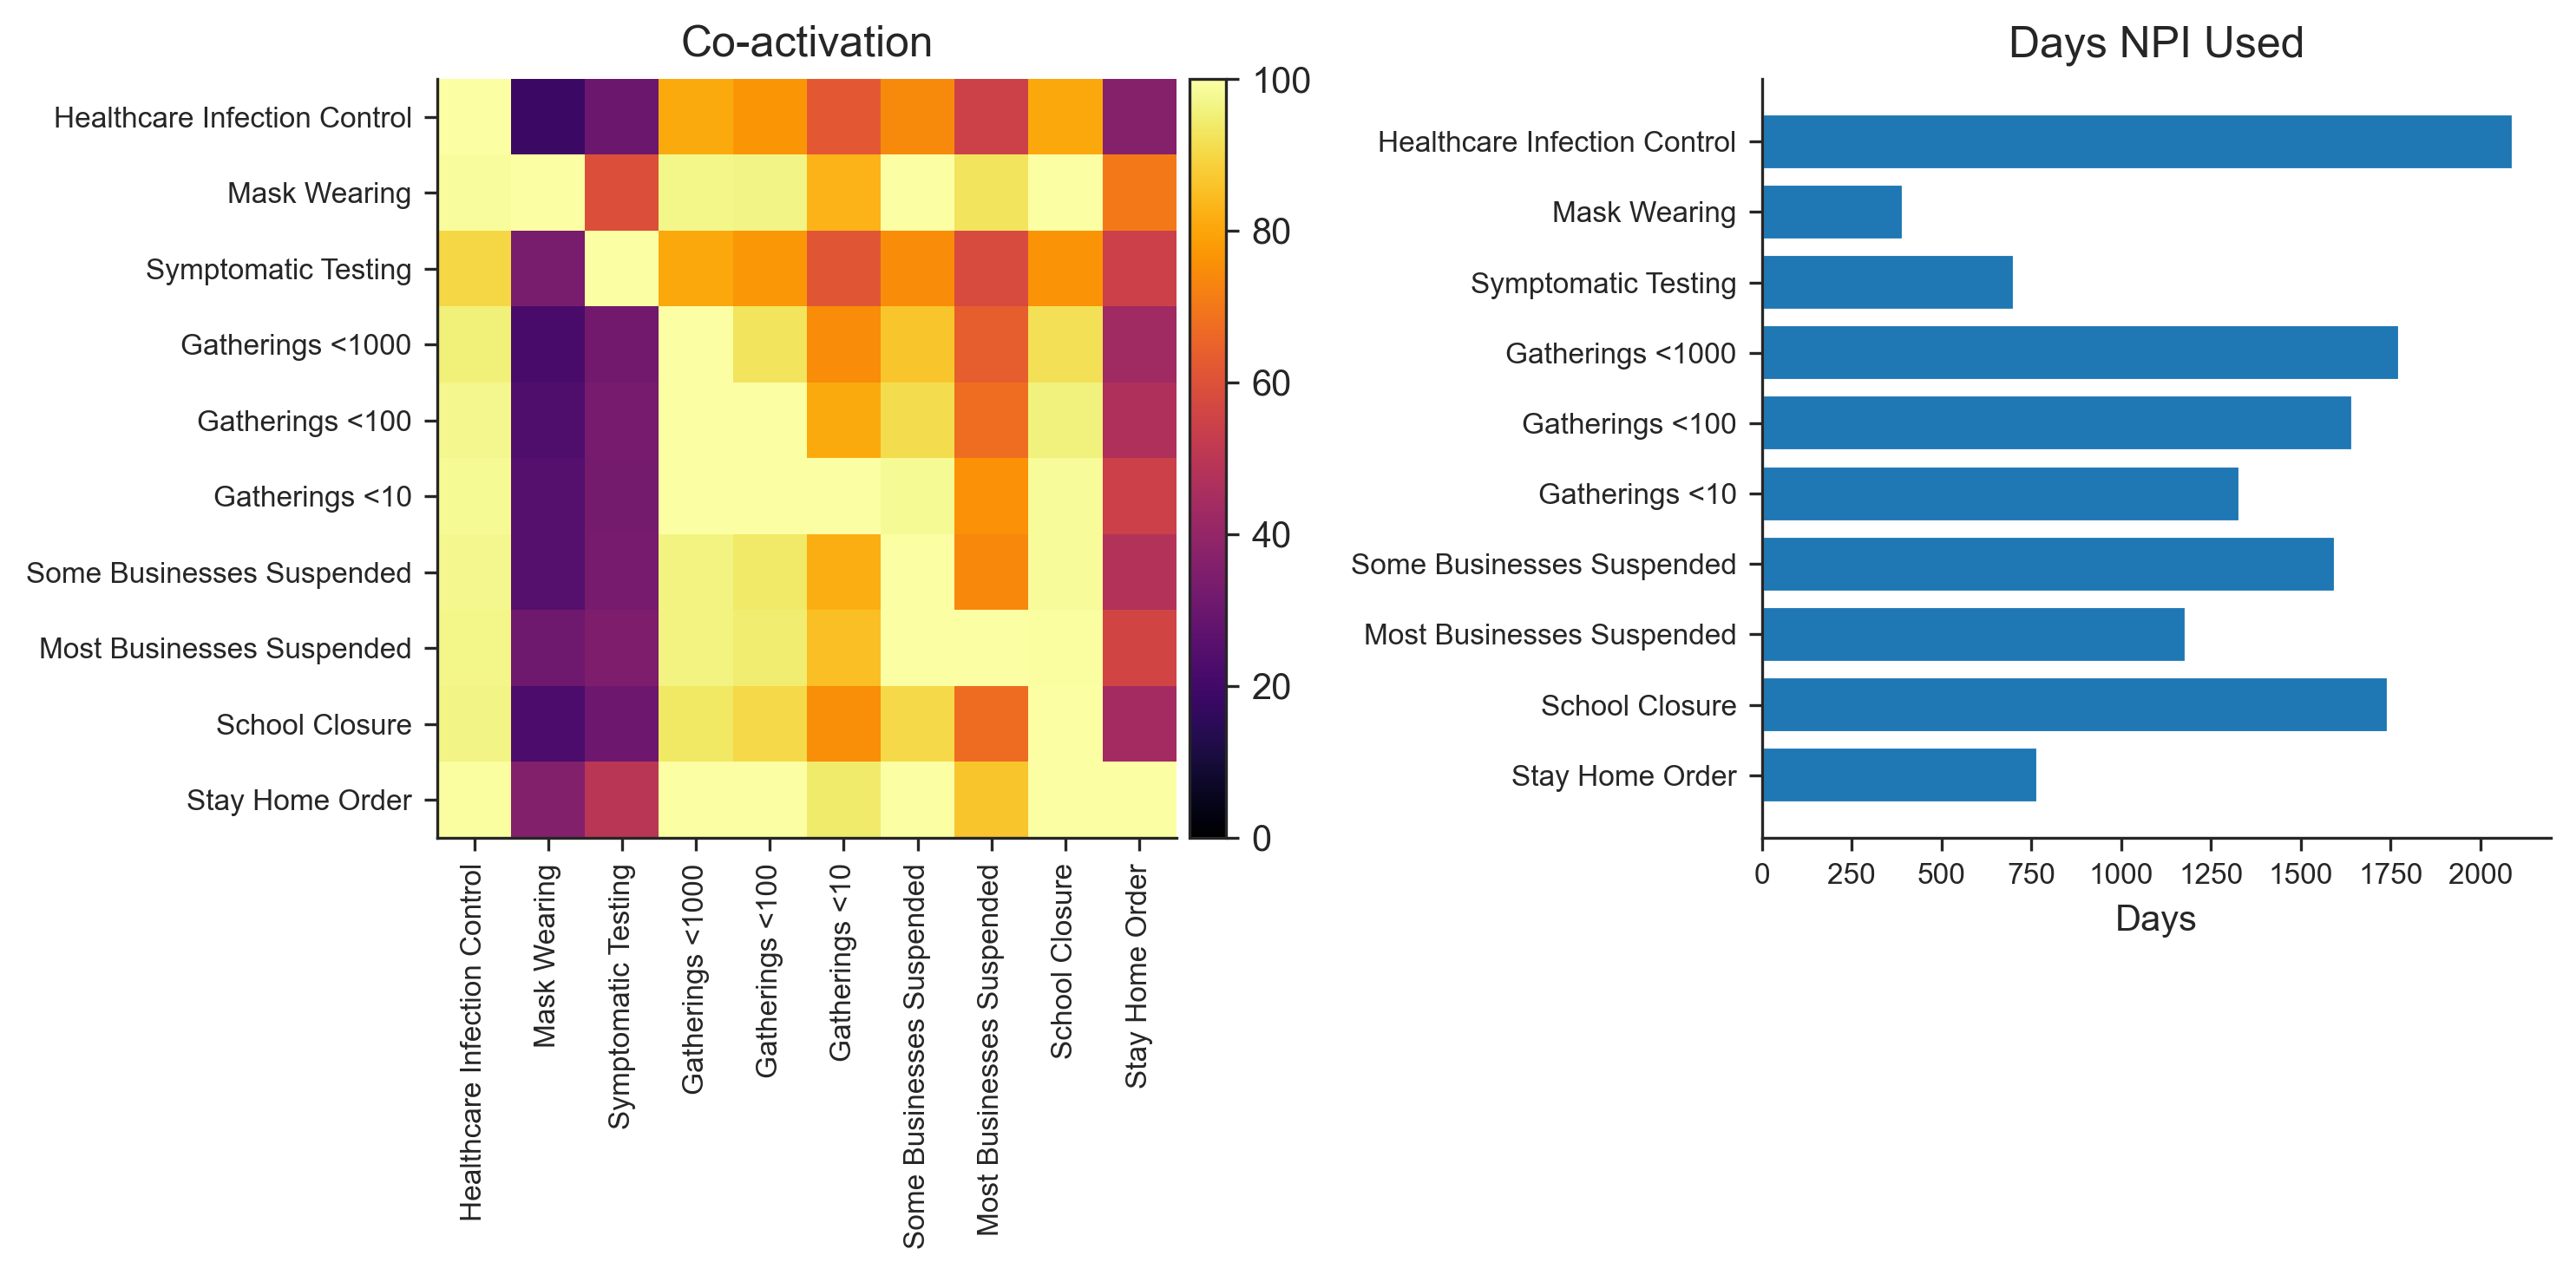

In [40]:
dm = DataMerger(start_date="2020-1-22", end_date="2020-4-25")
dm.merge_data("../../data", region_info, oxcgrt_filter,  oxcgrt_cm_cols,
            epifor_features,
            final_features)